In [15]:
import pandas as pd
import numpy as np

# 데이터 로드
url = 'http://lib.stat.cmu.edu/datasets/boston'
df = pd.read_csv(url, sep=r'\s+', skiprows=22, header=None)

# 데이터 전처리
data = np.hstack([df.values[::2, :], df.values[1::2, :2]])
target = df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [16]:
# 데이터프레임 생성
df = pd.DataFrame(data, columns=feature_names)
df['PRICE'] = target

# X와 y 설정
y = df['PRICE']
X = df.drop(['PRICE'], axis=1)


In [17]:
from sklearn.model_selection import train_test_split

# 데이터 분할 (훈련 데이터 70%, 테스트 데이터 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델 생성 및 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_hat = lr.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_hat)
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.2f}")

MSE: 21.52, RMSE: 4.64, R^2: 0.71


c:\Users\kweon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kweon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kweon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kweon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kweon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Line

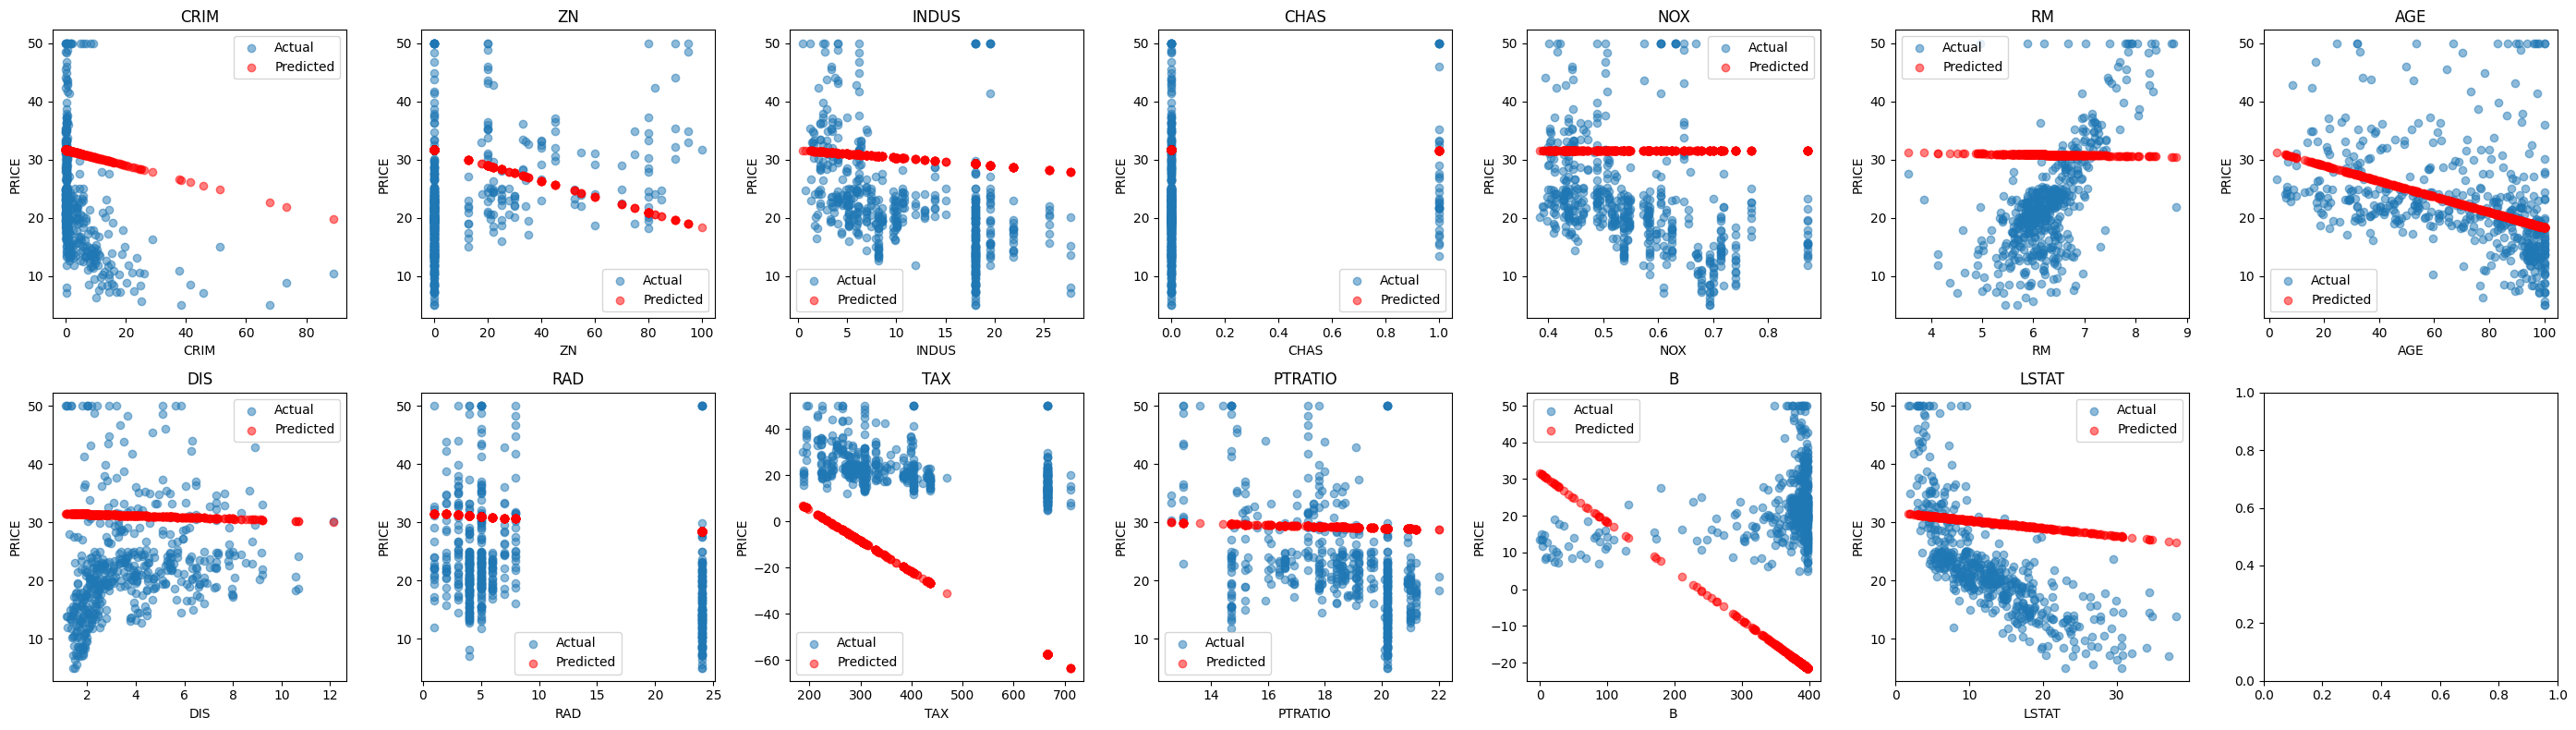

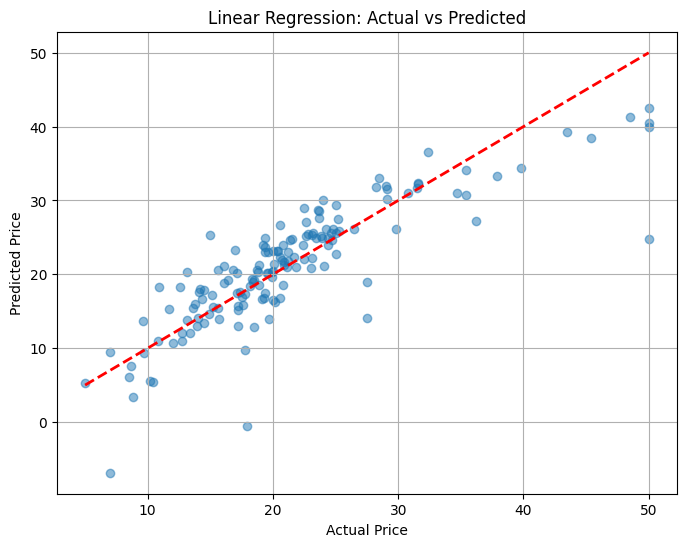

In [20]:
import matplotlib.pyplot as plt

# 시각화: 각 특성(feature)과 가격(PRICE)의 관계를 시각화
fig, axs = plt.subplots(2, 7, figsize=(28, 8))

# 각 특성(feature)에 대한 산점도
for i, feature in enumerate(feature_names):
    axs[i // 7][i % 7].scatter(df[feature], df['PRICE'], alpha=0.5, label='Actual')
    # 각 특성에 대해 선형 회귀 예측을 해줍니다
    feature_data = df[feature].values.reshape(-1, 1)  # 단일 특성에 대해 예측
    y_pred = lr.predict(np.hstack([feature_data, np.zeros((feature_data.shape[0], X.shape[1] - 1))]))  # 나머지 특성은 0으로 패딩
    axs[i // 7][i % 7].scatter(df[feature], y_pred, color='red', alpha=0.5, label='Predicted')
    axs[i // 7][i % 7].set_title(feature)
    axs[i // 7][i % 7].set_xlabel(feature)
    axs[i // 7][i % 7].set_ylabel('PRICE')
    axs[i // 7][i % 7].legend()

plt.tight_layout()
plt.show()

# 실제 값 vs 예측 값 산점도
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_hat, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()